<a href="https://colab.research.google.com/github/s-jainr/data-science-sp23/blob/main/rahul_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4 (HW4)

Deadline: December 1st. Midnight

Hand in: the homework must be handed in through the Moodle system. 

<span style="color:red">Provide a written answer if requested in the exercise! These questions are marked in red.</span>

---

## Exercise 1 (HW 4/1)

In this exercise we will deal with polynomial regression. The goal will be to analize how the degree of the polynomial affects its performance. (60%)

**a)**  Create (simulate) data from some known probability distribution, i.e. create "artificial" two dimensional data! **Simulate at least 500 datapoints**.
* Use the data-generating function provided below on a chosen interval - feel free to modify the function to get data that suits your taste :)
* Visualize the data on a scatterplot!


(*Hint*: To check that you are proceeding correctly make sure that your scatterplot does look like a polynomial with added noise.)

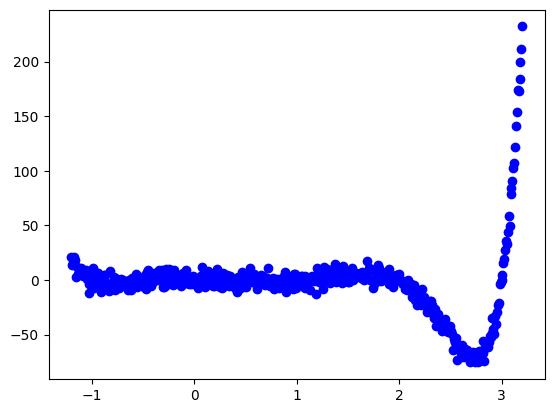

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

np.random.seed(0)

def curve_generator(x, sigma=0):
    # y = np.random.normal(x**5 - 5*x**3 + 4*x, sigma)
    y = np.random.normal(x**8 - 5*x**7 + 5*x**6 + 5*x**5 - 6*x**4, sigma)
    return y

X = np.linspace(-1.2, 3.2, 500)
y = curve_generator(X, sigma=5)

plt.scatter(X, y, c='b')

* Randomly select 2/3 of your data as your training set and the remaining as your test set! (Hint: use the *train_test_split* function!)
* Represent the training and test set data in the same figure with different colors. 

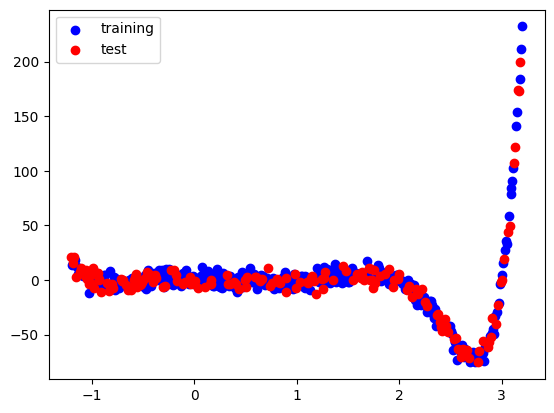

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

plt.scatter(X_train, y_train, c='b', label='training')
plt.scatter(X_test, y_test, c='r', label='test')
plt.legend()

**b)** Apply a simple polynomial regression to the data (target variable: $y$, explanatory variable: $x$). (Hint: use the *np.polyfit* function!) 
* Represent the training and test set error (RMSE-value) with different colors in one figure, as a function of the degree of the polynomial regression (analyze values of the polynomial degree between 0 and 20)!
* <span style="color:red">What can you observe? Interpret the plots!</span>

'Observation: The RMSE value only improves until we reach degree 8, \n   the true degree of the polynomial function '

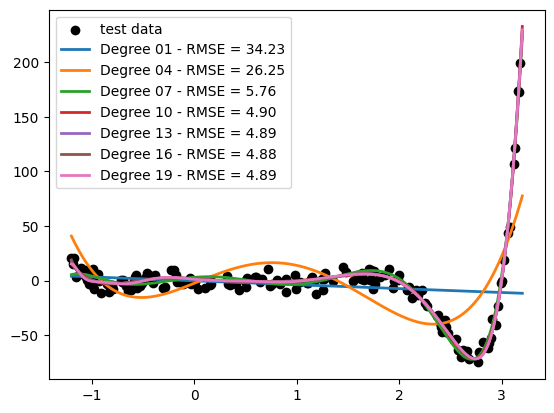

In [3]:
plt.clf()
plt.scatter(X_test, y_test, label='test data', c='black')

for deg in range(1, 22, 3):
  coefs = np.polyfit(X_train, y_train, deg)

  x_vals = np.array([X**i for i in range(deg, 0, -1)] + [1], dtype=object)

  fit_eq = (coefs @ x_vals)

  rmse = np.sqrt(np.sum((fit_eq - y)**2)/len(y))

  plt.plot(X, fit_eq, label=f'Degree {deg:02.0f} - RMSE = {rmse:.02f}', linewidth=2)

plt.legend()

'''Observation: The RMSE value only improves until we reach degree 8, 
   the true degree of the polynomial function '''

**c)** How does the modification of the size of the training set affect the performance of the model? 
* Carry out the following analysis for each of these polynomial degree values: 1,2,5 and 10. 
* Fix the degree of the polynomial regression and vary the size of the training set (by reducing the size of the original training set). 
    * Plot the training and test set errors (RMSE values) as a function of the size of the training set in the same figure. 
    * <span style="color:red">What can you observe? Interpret the plots!</span>

In [4]:
#@title Code for x and y labels on plot below { vertical-output: true }
#@title
def add_headers(fig,*,row_headers=None, col_headers=None, row_pad=1, col_pad=5, 
                rotate_row_headers=True, **text_kwargs):
    # Based on https://stackoverflow.com/a/25814386

    axes = fig.get_axes()

    for ax in axes:
        sbs = ax.get_subplotspec()

        # Putting headers on cols
        if (col_headers is not None) and sbs.is_first_row():
            ax.annotate(
                col_headers[sbs.colspan.start],
                xy=(0.5, 1),
                xytext=(0, col_pad),
                xycoords="axes fraction",
                textcoords="offset points",
                ha="center",
                va="baseline",
                **text_kwargs,
            )

        # Putting headers on rows
        if (row_headers is not None) and sbs.is_first_col():
            ax.annotate(
                row_headers[sbs.rowspan.start],
                xy=(0, 0.5),
                xytext=(-ax.yaxis.labelpad - row_pad, 0),
                xycoords=ax.yaxis.label,
                textcoords="offset points",
                ha="right",
                va="center",
                rotation=rotate_row_headers * 90,
                **text_kwargs,
            )

" Observation: with a sufficiently complex model, the number of \n    training points doesn't affect the RMSE"

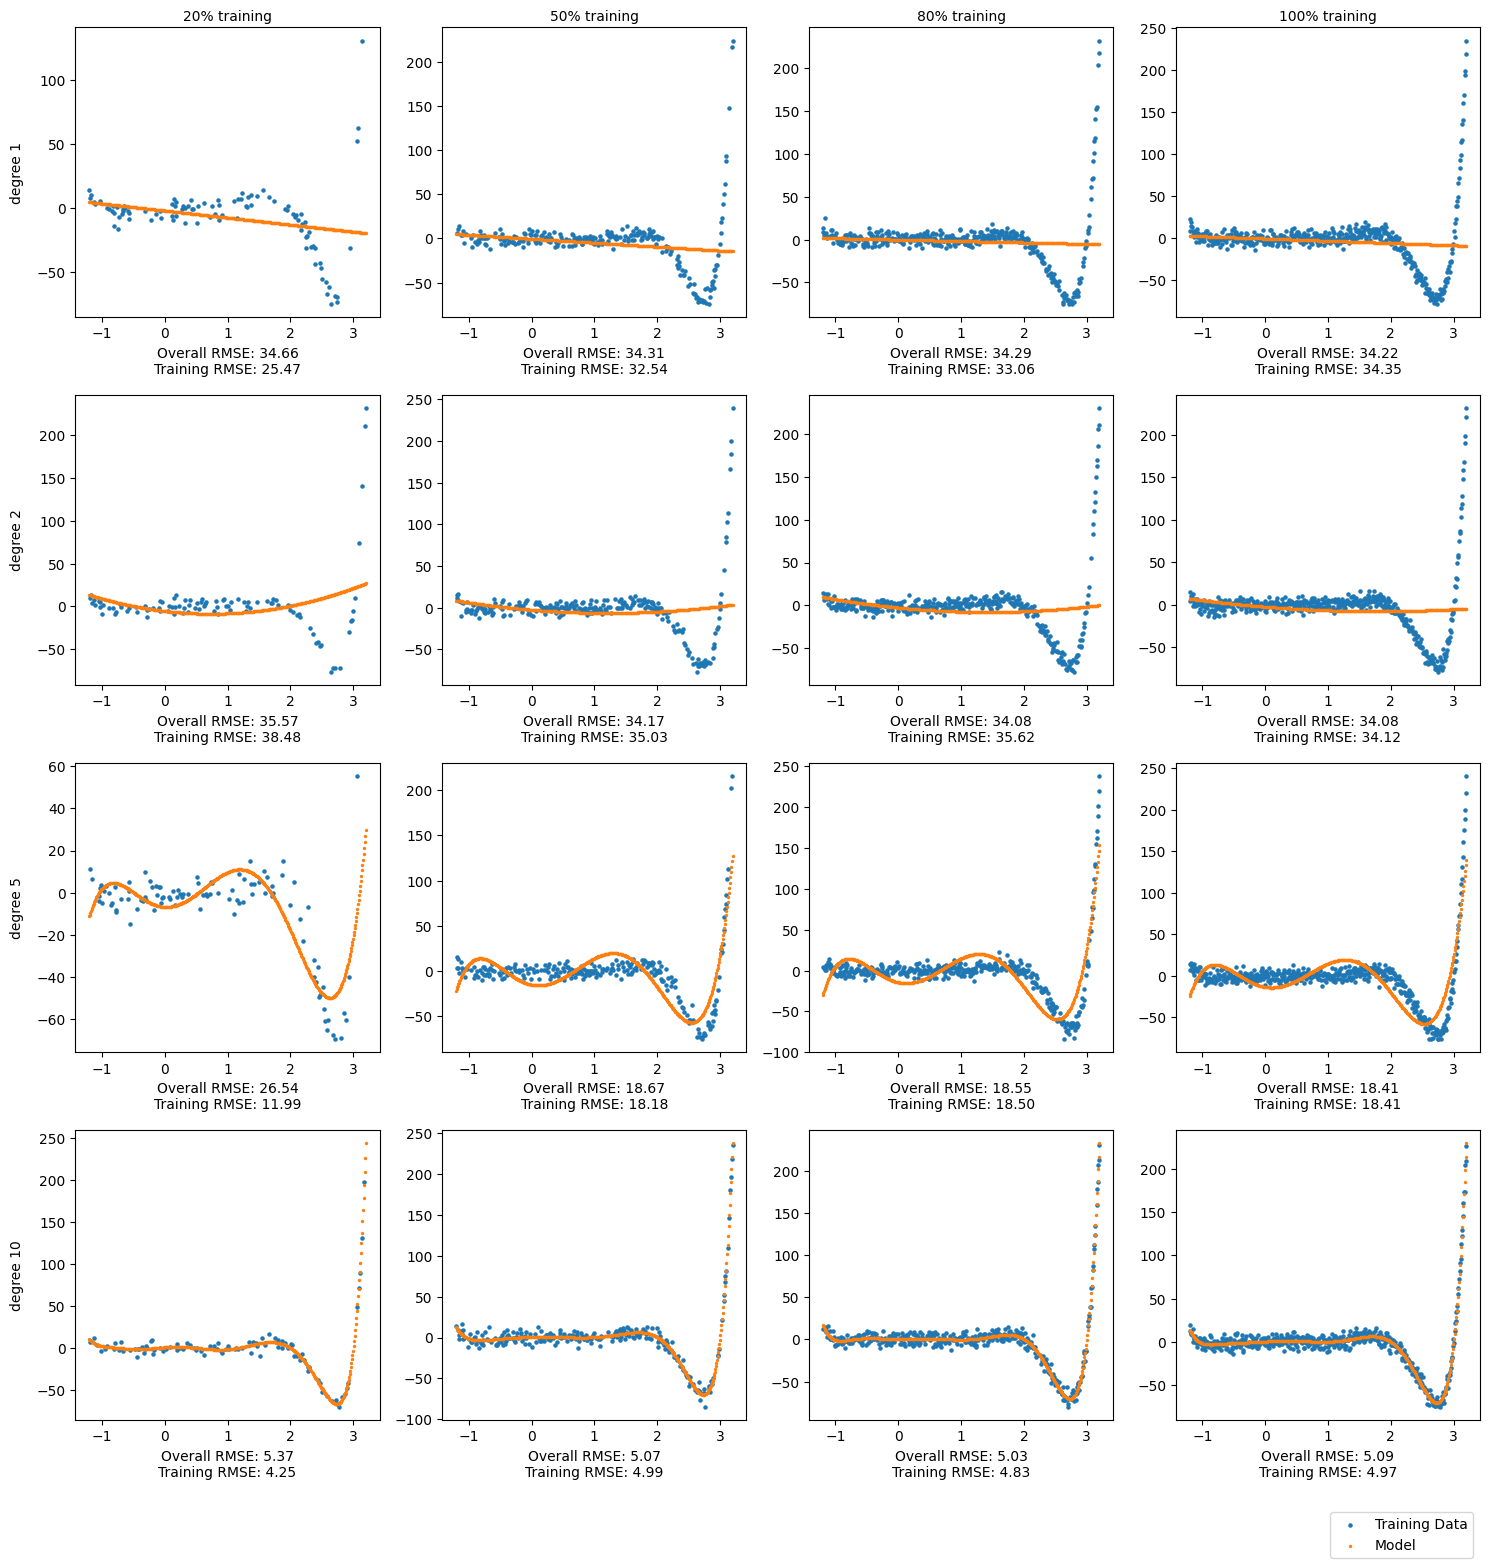

In [5]:
from random import sample

degs = [1, 2, 5, 10]
train_props = [0.2, 0.5, 0.8, 1]

rows = len(degs)
cols = len(train_props)

fig, axs = plt.subplots(nrows = rows, ncols = cols, figsize=(15, 15))

add_headers(fig, 
            col_headers=[f"{train_props[i]:.0%} training" for i in range(len(train_props))],
            row_headers=[f"degree {degs[i]}" for i in range(len(degs))])


for i in range(rows):
  for j in range(cols):

    deg = degs[i]
    t_prop = train_props[j]

    train_set = np.array(sample(sorted(X), int(len(X)*t_prop)))
    train_data = curve_generator(train_set, sigma=5)
    coefs = np.polyfit(train_set, train_data, deg)

    fit_eq = (coefs @ np.array([X**i for i in range(deg, 0, -1)] + [1], dtype=object))

    rmse_fit = np.sqrt(np.sum((fit_eq - y)**2)/len(y))
    rmse_training = np.sqrt(np.sum(((coefs @ np.array([train_set**i for i in range(deg, 0, -1)] + [1], dtype=object)) - train_data)**2)/len(train_data))

    axs[i, j].scatter(train_set, train_data, s = 5, label='Training Data')
    axs[i, j].scatter(X, fit_eq, s=2, label='Model')
    axs[i, j].set_xlabel(f"Overall RMSE: {rmse_fit:.02f}\nTraining RMSE: {rmse_training:.02f}")

fig.tight_layout()

plt.legend(loc='lower right', bbox_to_anchor=(1, -0.5))

''' Observation: with a sufficiently complex model, the number of 
    training points doesn't affect the RMSE'''

---

## Exercise 2 (HW4/2)

In this exercise you will have to solve a character recognition problem by training a neural network with Keras. (30%)

**a)** Train a neural network suitable for character recognition on the MNIST data set! Feel free to modify the notebook we used in class. Change a few parameters of the neural network (activation function, dropout rate, number of nodes in a layer, optimizer etc.). <span style="color:red"> Describe which model parameters you changed, and what effect they had on the performance of the model.</span> <br>(Hint: Install Keras with TensorFlow backend through the Anaconda Navigator Environments tab or you can also use Google Colab to solve this problem. You can use a fast GPU on Colab for free!).

In [6]:
# imports for plotting and displaying the data
from IPython.core.display import HTML
HTML("<style>.container { width:100% !important; }</style>")
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import PIL.Image
from PIL import ImageOps
import numpy as np
from matplotlib.pyplot import imshow
sns.set(font="Droid Sans",font_scale = 1)
sns.set_style("white")
sns.set_color_codes("dark")

In [7]:
# Preprocessing

from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255

x_train = x_train.reshape(-1,28,28,1) 
x_test = x_test.reshape(-1,28,28,1)

x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [9]:
model = Sequential() 
model.add(Conv2D(32, (5, 5), strides=(1, 1), input_shape=(28, 28, 1), activation='relu', data_format="channels_last")) 
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4), strides=(3, 3)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping=EarlyStopping(patience=10, verbose=1)

checkpointer=ModelCheckpoint(filepath='weights.hdf5', save_best_only=True, verbose=1)
network_history = model.fit(x_train, y_train, batch_size=128, 
                            epochs=100, verbose=1, validation_split=0.2,
                  callbacks=[checkpointer, early_stopping])

''' I changed the max pooling size and strides; by doubling the pool size and increasing strides to 3, 
    the model trained one epoch faster but with a marginally lower validation accuracy'''

Epoch 1/100
374/375 [============================>.] - ETA: 0s - loss: 0.2171 - accuracy: 0.9381
Epoch 1: val_loss improved from inf to 0.06743, saving model to weights.hdf5
375/375 [==============================] - 13s 15ms/step - loss: 0.2167 - accuracy: 0.9382 - val_loss: 0.0674 - val_accuracy: 0.9800
Epoch 2/100
373/375 [============================>.] - ETA: 0s - loss: 0.0592 - accuracy: 0.9814
Epoch 2: val_loss improved from 0.06743 to 0.05510, saving model to weights.hdf5
375/375 [==============================] - 3s 7ms/step - loss: 0.0590 - accuracy: 0.9815 - val_loss: 0.0551 - val_accuracy: 0.9836
Epoch 3/100
372/375 [============================>.] - ETA: 0s - loss: 0.0411 - accuracy: 0.9875
Epoch 3: val_loss improved from 0.05510 to 0.05156, saving model to weights.hdf5
375/375 [==============================] - 3s 9ms/step - loss: 0.0411 - accuracy: 0.9875 - val_loss: 0.0516 - val_accuracy: 0.9850
Epoch 4/100
371/375 [============================>.] - ETA: 0s - loss: 0.03

' I changed the max pooling size and strides; by doubling the pool size and increasing strides to 3, \n    the model trained one epoch faster but with a marginally lower validation accuracy'

In [10]:
from keras.models import load_model
model = load_model("weights.hdf5")
test_err = model.evaluate(x_test,y_test)
print("Loss on test set:", test_err[0], "Accuracy on test set:", test_err[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0294 - accuracy: 0.9911
Loss on test set: 0.029401645064353943 Accuracy on test set: 0.991100013256073


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, confusion_matrix

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,1)
y_true = np.argmax(y_test,1)

print("Test accuracy: %g" %(accuracy_score(y_true, y_pred)))
print("Precision", precision_score(y_true, y_pred, average="macro")) #one vs rest averages or global
print("Recall", recall_score(y_true, y_pred, average="macro")) #macro calculates the average of the recall for each class
print("f1_score", f1_score(y_true, y_pred, average="macro")) #macro is good for balanced data set, micro is good for imbalanced
print("\n Confusion matrix ")
conf=confusion_matrix(y_true, y_pred)
print(conf)

313/313 [==============================] - 1s 2ms/step
Test accuracy: 0.9911
Precision 0.9909578202595973
Recall 0.9909970714975014
f1_score 0.9909544405027335

 Confusion matrix 
[[ 976    0    1    0    0    0    1    1    1    0]
 [   0 1126    2    4    0    1    1    0    1    0]
 [   0    0 1025    1    0    0    0    4    2    0]
 [   0    0    1 1006    0    2    0    0    1    0]
 [   0    0    0    0  974    0    1    1    2    4]
 [   0    0    0    6    0  882    1    1    2    0]
 [   4    3    0    1    2    8  935    0    5    0]
 [   0    0    1    1    0    0    0 1025    1    0]
 [   2    0    1    0    0    1    0    0  969    1]
 [   0    0    1    1    3    5    0    4    2  993]]


**b)** Use the model to try to recognize your own hand-written characters! To do this, scan or take a picture some of your hand-written characters, and apply the model to them. You can find hints on how to do this in the notebook used in class. <span style="color:red">Does the model recognize your handwriting? </span>

In [12]:
im = PIL.Image.open('./rahul_digits.jpg')
width, height = im.size
width, height

(1686, 168)

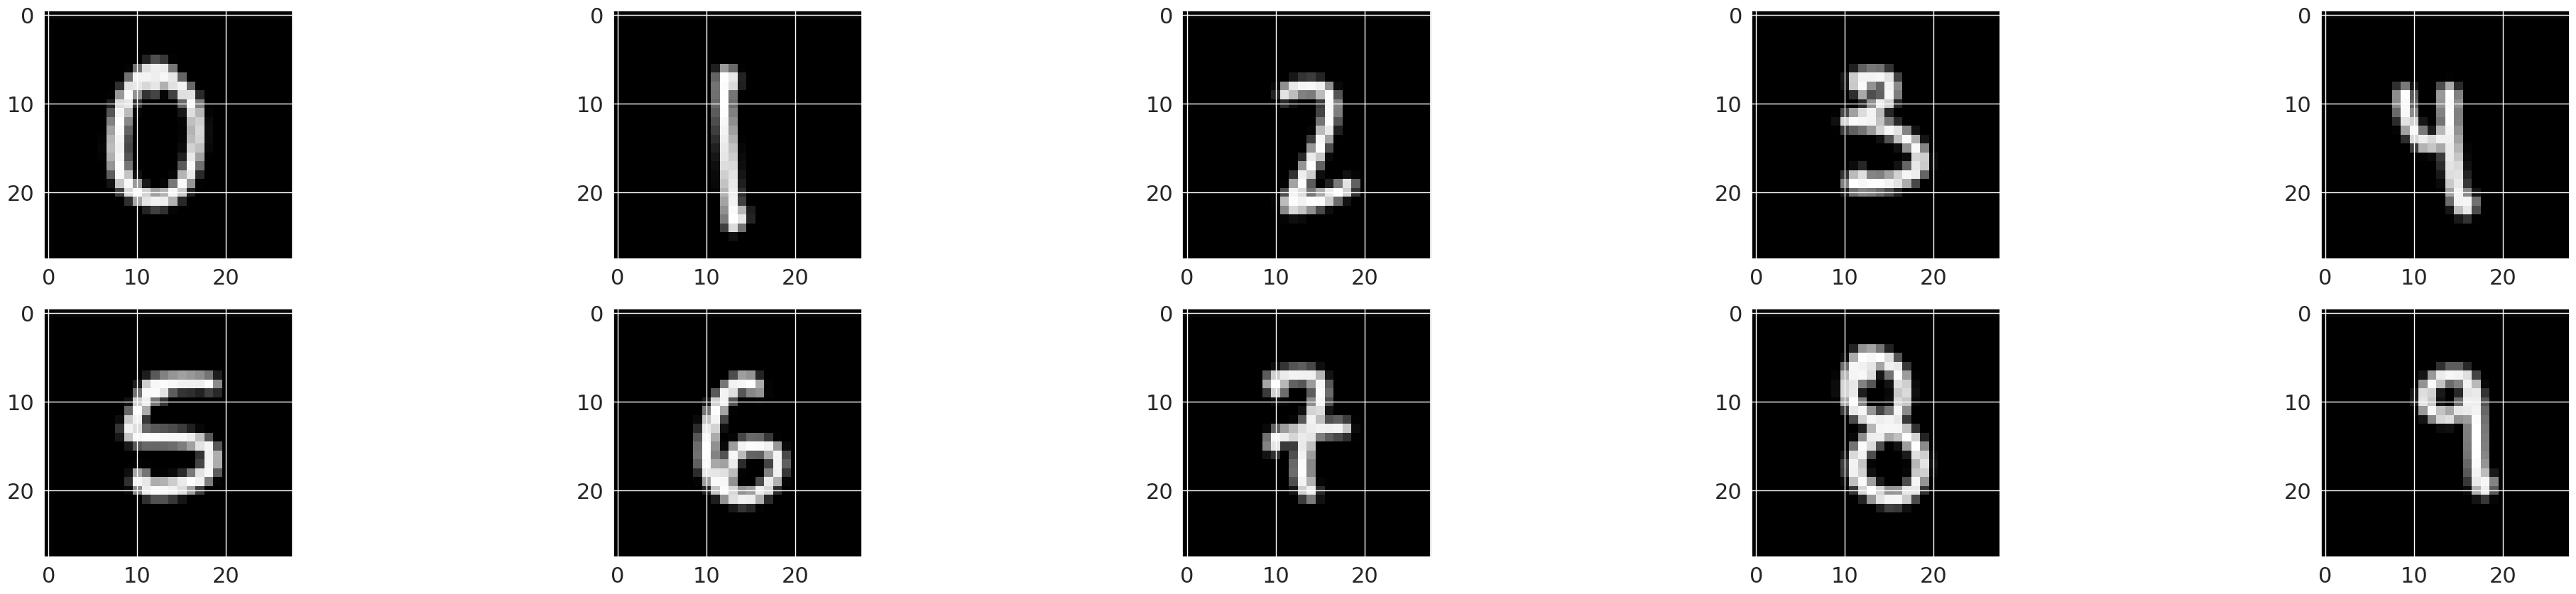

In [13]:
sns.set(font_scale = 2)
# visualizing hand-written digits
thresholds = {}
for i in range(0, 10):
  thresholds[i] = (height * i, 0, height*(i+1), height)

plt.figure(figsize = (50, 10))
for i in range(10):
    image = PIL.Image.open("./rahul_digits.jpg")
    width, height = image.size
    image = image.crop(thresholds[i])
    image = ImageOps.invert(image)
    image.thumbnail((28, 28))
    image_data = np.asarray(image, dtype=np.uint8)
    image_data = image_data.sum(2).astype(float)
    image_data /= image_data.max()
    plt.subplot(2, 5, i+1)
    plt.imshow(image_data, cmap = plt.cm.gray)

1/1 [==============================] - 0s 19ms/step


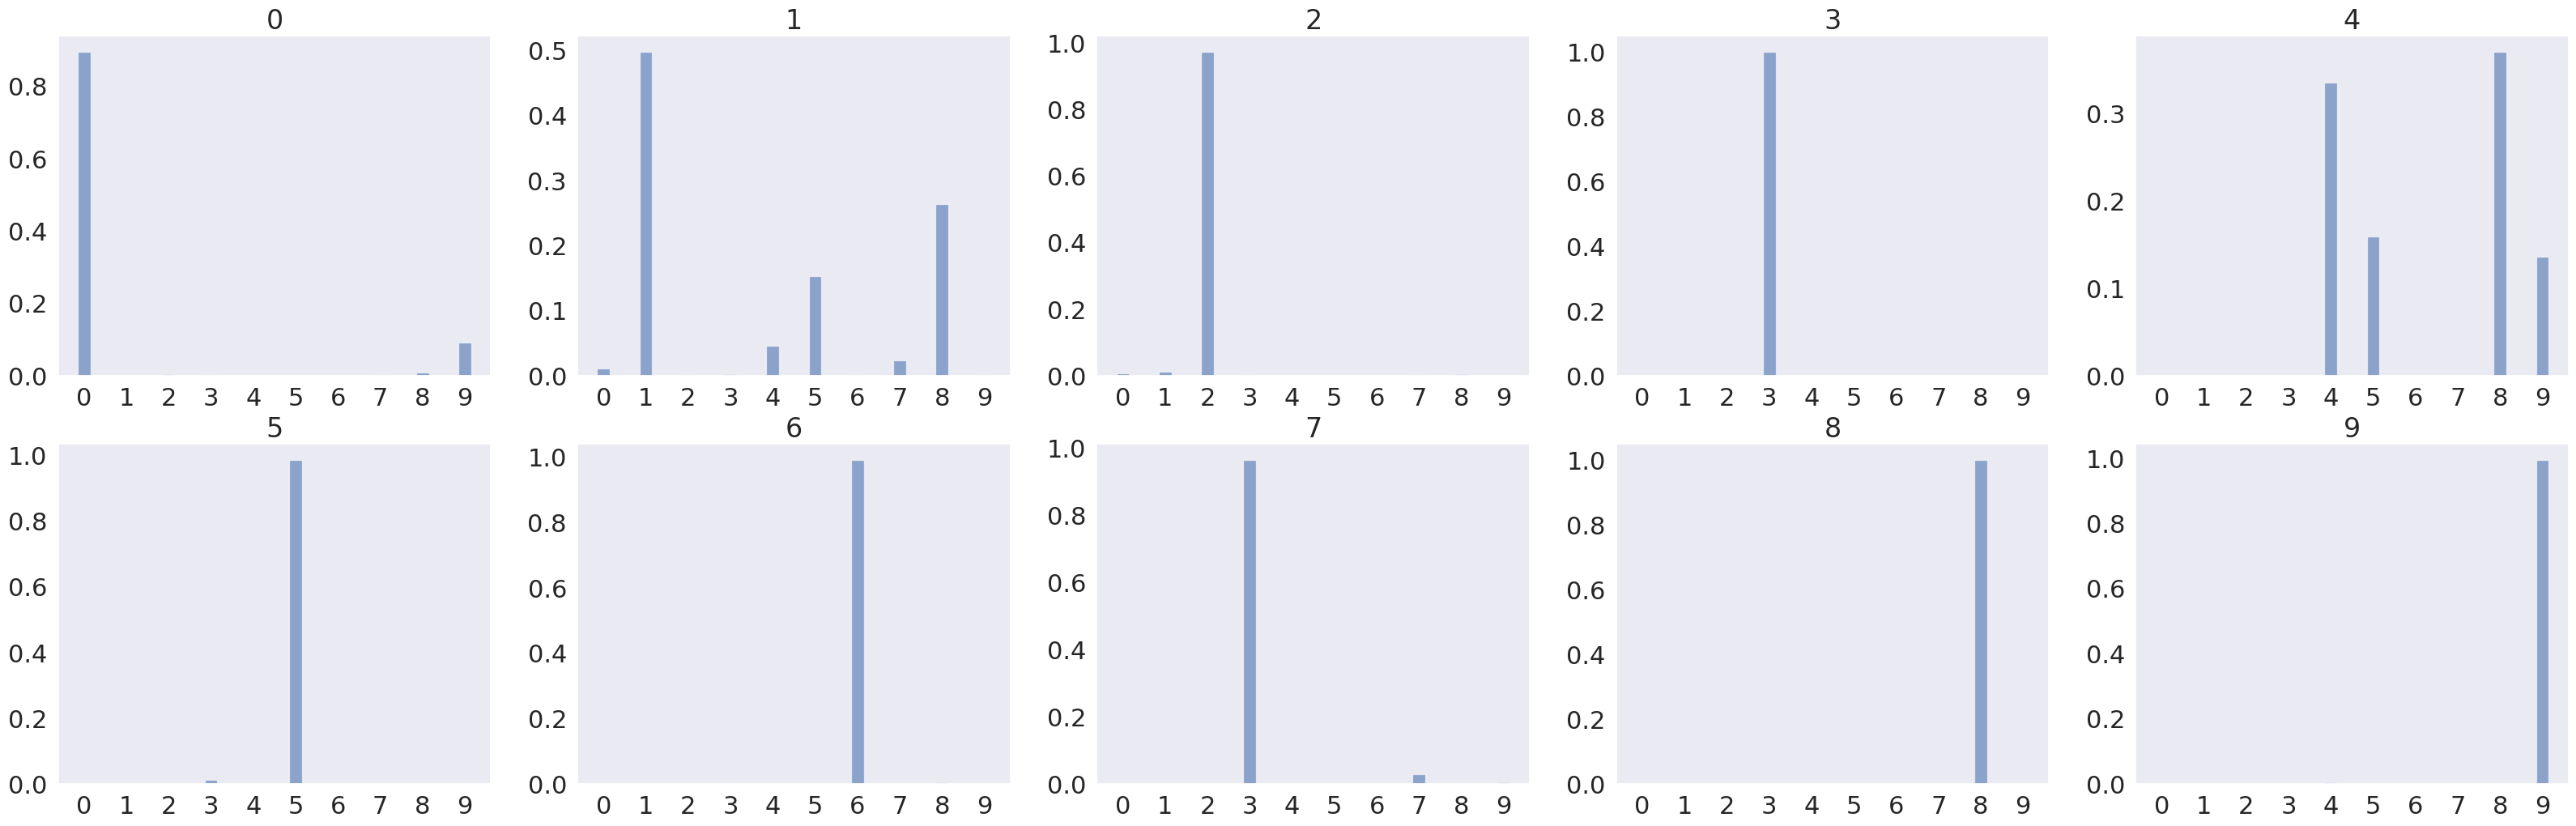

In [14]:
# using the trained model to recognize hand-written digits
plt.figure(figsize=(40, 12))
for i in range(10):
    image = PIL.Image.open("./rahul_digits.jpg")
    width, height = image.size
    image = image.crop(thresholds[i])
    image = ImageOps.invert(image)
    image.thumbnail((28, 28))
    image_data = np.asarray(image, dtype = np.uint8)
    image_data = image_data.sum(2).astype(float)
    image_data /= image_data.max()
    image_data = image_data.reshape(-1, 28, 28, 1)
    predictions = model.predict(image_data > 0.8)
    plt.subplot(2, 5, i+1)
    plt.bar(range(10), predictions[0] , 0.3, color = "b", alpha = 0.6)
    plt.title(i)
    plt.grid()
    plt.xticks(range(10))

    ''' the model can recognize my handwriting fairly well!
        The only issues it has seem to be with zero (partially confusing it with a nine), 
        four (since my four is a slightly curved it's hard to tell),
        and seven (it thinks my seven is a three)!!'''